# <center>Data Visualization Project: <br>"Ford GoBike" Bicycle-Sharing Explanatory Analysis</center>
### <center>by Karine Legrand</center>

## Investigation Overview
Based on the previous Exploratory Analysis that we conducted on the Dataset of the "Bay Wheels" Company (former "Ford GoBike"), we will convey our findings, depicting how the bike rentals service has been used, during the year 2018.<br>We will therefore, illustrate the answers to the following questions:
- <b>"Who uses the rentals service?"</b>
- <b>"When are the bikes used?"</b>
- <b>"How long do the rides take?"</b>

We found out that we need to combine these questions, in order to fully answer each one of them. So answering the three distinct questions, eventually turns into answering: <b>"Who uses the rentals service, when and for how long?"</b><br>
We will proceed step by step and illustrate each answer, as we move on combining the questions.

## Dataset Overview
The cleaned Dataset, that we elaborated during the previous phase of our project, contains more than 1,7 millions (1 753 003) observations of bike rentals in the area of Greater San Fransisco, for the whole year of 2018. Each record describes one rental through features, such as "duration" (in minutes) and "pick-up time" perspectives (month, day of the week, hour of the day) as well as user characteristics like "user-type"(Customer/Subscriber), "gender" and "age".

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
import os

# load in the dataset into a pandas dataframe
datafolder = 'data' # the csv file should be in a 'data' directory, under the current directory
csvfile = os.path.join(datafolder,"datasetcleaned.csv")

df_rentals= pd.read_csv(csvfile)
df_rentals.head()

,start_time,end_time,duration_min,month,month_name,day,date,weekday,weekday_name,holiday,is_weekend,hour_of_day,gender,age_level,user_type,bike_share
0,2018-01-01 00:07:41.040,2018-01-01 00:10:06.241,2,1,January,1,2018-01-01,0,Monday,True,False,0,Male,60s,Subscriber,No
1,2018-01-01 00:07:52.943,2018-01-01 00:19:47.075,11,1,January,1,2018-01-01,0,Monday,True,False,0,Male,30s,Subscriber,No
2,2018-01-01 00:09:31.745,2018-01-01 00:28:43.159,19,1,January,1,2018-01-01,0,Monday,True,False,0,Male,20s,Subscriber,No
3,2018-01-01 00:14:37.187,2018-01-01 00:37:16.445,22,1,January,1,2018-01-01,0,Monday,True,False,0,Male,20s,Customer,No
4,2018-01-01 00:15:33.369,2018-01-01 00:58:56.522,43,1,January,1,2018-01-01,0,Monday,True,False,0,Male,20s,Subscriber,Yes


In [3]:
df_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753003 entries, 0 to 1753002
Data columns (total 16 columns):
start_time      object
end_time        object
duration_min    int64
month           int64
month_name      object
day             int64
date            object
weekday         int64
weekday_name    object
holiday         bool
is_weekend      bool
hour_of_day     int64
gender          object
age_level       object
user_type       object
bike_share      object
dtypes: bool(2), int64(5), object(9)
memory usage: 190.6+ MB


In [4]:
# we set a few variables needed later for axis labelling.
# hold the month's names in order for labelling of the x-axis
import calendar

months = [calendar.month_name[i] for i in np.arange(1,13)]
print(months)

days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.


## Who uses the rentals service?
We first need to get a Picture about the users behind each rental and will depict how their characteristics are distributed.

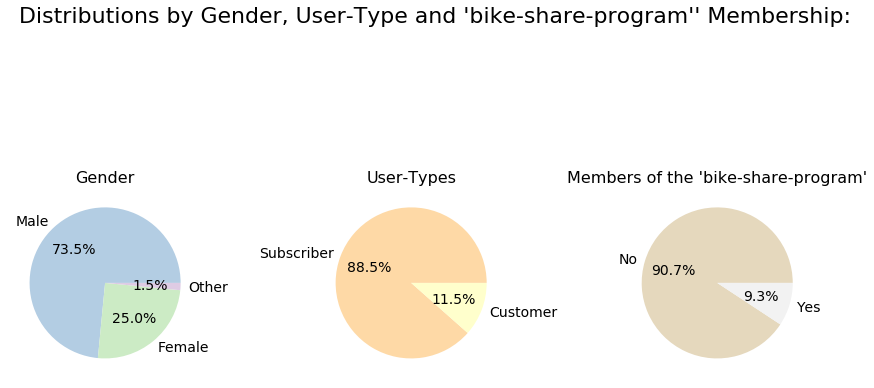

In [5]:
by_gender= df_rentals.gender.value_counts()
user_types= df_rentals.user_type.value_counts()
bike_share= df_rentals.bike_share.value_counts()

fig= plt.figure(figsize=[12,8]);
#plt.subplots(1,3,figsize=[12, 8])
plt.suptitle("Distributions by Gender, User-Type and \'bike-share-program\'' Membership:",\
             fontsize=22)

cmap = plt.cm.Pastel1
plt.subplot(1, 3, 1);
pastel_colors = cmap([1, 2, 3])

plt.pie(by_gender, labels=by_gender.index, autopct='%1.1f%%', colors= pastel_colors,\
        textprops={'fontsize': 14});
plt.title('Gender',fontsize=16);


plt.subplot(1, 3, 2);
pastels_user_types = cmap([4, 5])
plt.pie(user_types, labels=user_types.index, autopct='%1.1f%%', colors= pastels_user_types, \
       textprops={'fontsize': 14});
plt.title('User-Types', fontsize=16);

plt.subplot(1,3,3);
pastels_bike_share= cmap([6,8])
plt.pie(bike_share, labels=bike_share.index, autopct='%1.1f%%', colors= pastels_bike_share, \
       textprops={'fontsize': 14});
plt.title('Members of the \'bike-share-program\'', fontsize=16);

plt.tight_layout(pad=0.4, w_pad=1.5);

<font size="3">Note: We kept the categorical levels for the gender characteristic, as given in the dataset: There are 3 categories of gender ("Female", "Male" and "Other"), which we find just appropriate, to describe a population nowadays.</font> 

In [6]:
# make an ordered categorical variable from "age_level"
age_levels= ['18-19', '20s', '30s', '40s', '50s', '60s', 'elderly']
age_cat = pd.api.types.CategoricalDtype(categories=age_levels, ordered=True)
df_rentals.age_level= df_rentals.age_level.astype(age_cat)
df_rentals.age_level.dtype
print(df_rentals.age_level.value_counts())

20s        671027
30s        615016
40s        263111
50s        128588
18-19       38565
60s         29863
elderly      6833
Name: age_level, dtype: int64


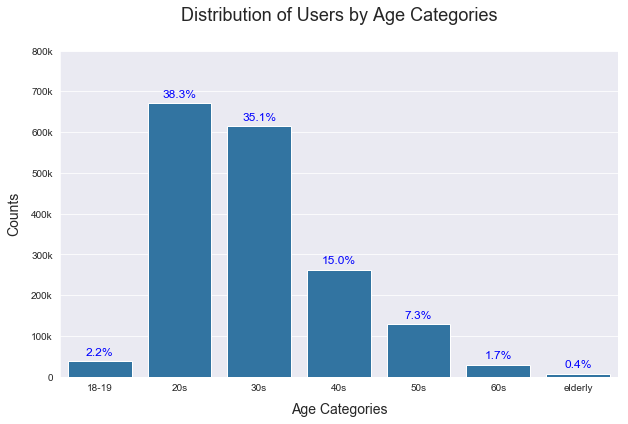

In [7]:
sns.set_style('darkgrid');
blue_color= sns.color_palette()[0] 
plt.figure(figsize=[10,6])
# plot the barchart with seaborn/countplot:
sns.countplot(data= df_rentals, x=df_rentals.age_level, color=blue_color);
plt.xlabel('Age Categories', fontsize=14, labelpad=10);
plt.ylabel('Counts', fontsize=14, labelpad=10);
plt.title('Distribution of Users by Age Categories', fontsize=18, pad=30);

# tweak the plot
plt.ylim(0, 8e5);
loc_y, ylabels= plt.yticks()
#print(loc_y)
#remplacer les 3 derniers 0 par 'k'
#str_ticks= [num.astype(str) for num in loc_y]
#print(str_ticks)
plt.yticks(loc_y, [0, "100k", "200k", "300k", "400k", "500k", "600k", "700k", "800k"]);

# we also want to annotate the relative frequency (in percents) to simplify the comparison.
age_counts= df_rentals.age_level.value_counts() #to get each absolute frequency value
total_rentals= df_rentals.shape[0]

locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
#    print(loc, label, label.get_text())
    absolute= age_counts[label.get_text()]# get the count for each bar
    pct_str= '{:0.1f}%'.format(absolute/total_rentals*100)# percent with one decimal precision
    plt.text(loc, absolute+15000, pct_str, ha='center', color='blue', fontsize=12);
    # absolute+15000 is used to display the percentage value, above each bar 

<font size="3">73.4% of users are between 20 and 39 years old.</font>

## Q: Who uses the rentals service?<br><br>A:
$73.5\%$ of the users are male. $73.4\%$ are between 20 and 39 years old and $88.5\%$ subscribed to the service and are probably residents of the Bay. About $10\%$ of these "Subscribers" are enrolled in the so-called "bike-share program" for pricing advantage purposes.

## When are the bikes used?
An Overview by month, week and day.

In [8]:
df_bymonth= df_rentals.groupby('month').size()
df_bymonth

month
1      86963
2      98626
3     102347
4     121791
5     167376
6     183364
7     186793
8     181247
9     176303
10    192804
11    129037
12    126352
dtype: int64

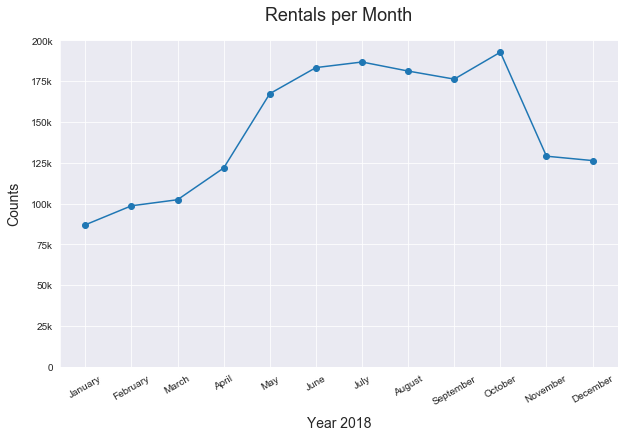

In [9]:
# Plot the number of rentals by month 
plt.figure(figsize=[10,6]);
plt.plot(df_bymonth.index, df_bymonth, 'o-');
# start y with 0
plt.ylim(0, 200000);
plt.yticks([0, 25000, 50000, 75000, 100000, 125000, 150000,175000,200000], \
          [0, "25k","50k","75k", "100k", "125k", "150k", "175k", "200k"]);
plt.xticks(df_bymonth.index, labels=months, rotation= 30);
plt.ylabel("Counts", labelpad=10, fontsize=14);
plt.xlabel("Year 2018", labelpad=10, fontsize=14)
plt.title("Rentals per Month", pad=20, fontsize=18);

<font size="3">As we could have expected, there is a higher use of rentals during the summer, where the climate conditions are the best for riding a bike. Less expected, there is a peak of rentals contracted in October, with 192 804 rides recorded in this month alone.<br></font>

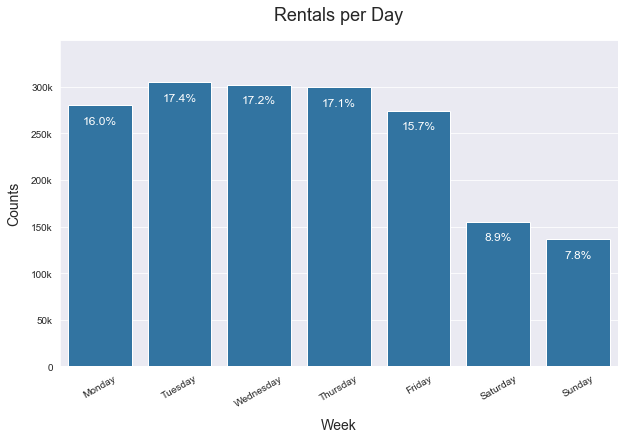

In [10]:
blue_color= sns.color_palette()[0] 
plt.figure(figsize=(10, 6));

# plot the barchart with seaborn/countplot:
sns.countplot(data= df_rentals, x=df_rentals.weekday_name, order=days,color=blue_color);
plt.xlabel('Week', labelpad=10, fontsize=14);
plt.ylabel('Counts', labelpad=10, fontsize=14);
plt.title('Rentals per Day', pad=20, fontsize=18);
locs_y, ylabels= plt.yticks()
plt.xticks(np.arange(7), labels=days, rotation=30);
plt.yticks(locs_y, [0, "50k","100k", "150k", "200k", "250k", "300k"]);
# we also want to annotate the relative frequency (in percents) to simplify the comparison.
day_counts= df_rentals.weekday_name.value_counts() #to get each absolute frequency value
total_rentals= df_rentals.shape[0]

locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
    #print(loc, label, label.get_text())
    absolute= day_counts[label.get_text()]# get the count for each bar
    pct_str= '{:0.1f}%'.format(absolute/total_rentals*100)# percent with one decimal precision
    plt.text(loc, absolute-20000, pct_str, ha='center', color='white', fontsize=12);
    # absolute-15000 is used to display the percentage value, lower than the top of each bar 

<font size="3">Most rentals are used quite equally, during working days. About half as much rentals are counted during the week-end.</font>

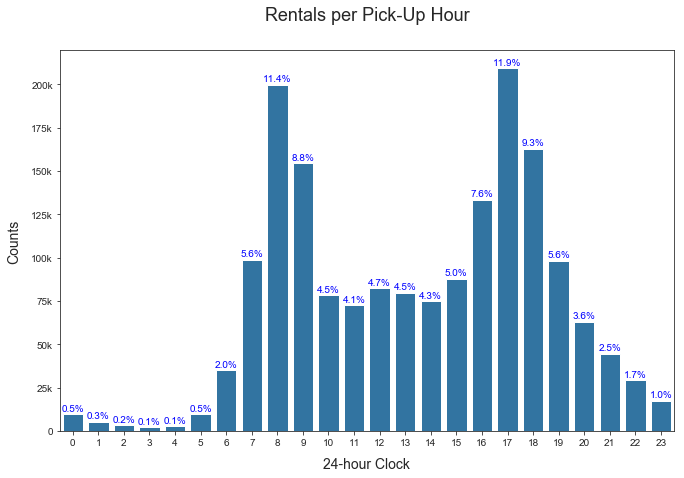

In [11]:
sns.set_style('ticks');
plt.figure(figsize=[11, 7])
sns.countplot(data=df_rentals, x=df_rentals.hour_of_day, color=blue_color);

# annotate the relative frequency (in percents)
hour_counts= df_rentals.hour_of_day.value_counts() #to get each absolute frequency value
total_rentals= df_rentals.shape[0]

locs,labels = plt.xticks()
for loc,label in zip(locs, labels):
    absolute= hour_counts[int(label.get_text())]
    pct_str= '{:0.1f}%'.format(absolute/total_rentals*100)
    plt.text(loc, absolute+2000, pct_str, ha='center', fontsize=10, color='blue');

plt.xlabel("24-hour Clock", labelpad=10, fontsize=14);
plt.title("Rentals per Pick-Up Hour", pad=30, fontsize=18);
plt.ylabel("Counts", labelpad=10, fontsize=14);
plt.yticks(np.arange(0, 225000, 25000), [0, "25k", "50k","75k","100k", "125k", "150k", "175k", "200k"]);

<font size= "3">The distribution of rentals by pick-up hour is clearly bimodal, with two peaks during typical office opening and closing hours, between 7-9am and 4-6pm.</font>

## Q: When are the bikes used?<br>A:
Rentals are used, all through the year:<br>
- mostly during the warmer months from May until October
- during the week, mainly and rather constantly on working days and half as much on week-ends
- during the day, mostly around offices' opening/closing hours, between 7-9am and 4-6pm. 


## How long do the rides take?
We will now take a look at the distribution of the rentals' duration in minutes.

<font size="3">First plotting a histogram on a linear scale of the duration (x-axis):</font> 

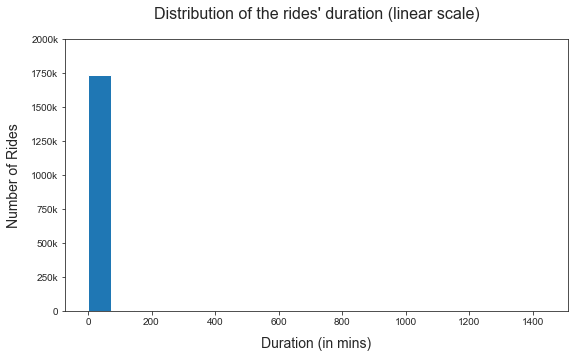

In [12]:
sns.set_style('ticks')
plt.figure(figsize=[9, 5]);
plt.hist(df_rentals.duration_min, bins= 20);
plt.xlabel('Duration (in mins)', fontsize=14, labelpad=10);
plt.ylabel('Number of Rides', fontsize=14, labelpad=10);
plt.title("Distribution of the rides' duration (linear scale)", fontsize= 16, pad=20);
yticks, ylabels= plt.yticks();
ylabels=[0, "250k", "500k", "750k", "1000k", "1250k", "1500k", "1750k", "2000k"]
plt.yticks(yticks, ylabels);

<font size="3">The distribution is extremly right skewed, as the duration variable takes a wide range of values (between 1 minute up to almost 24 hours). This is making it hard to recognize any pattern of use...</font>

<font size="3">...We will try to get a better idea of the distribution of the duration, by using a logarithmic scale of its values, on the x-axis:</font> 

In [13]:
# calculate the bin edges if we want a total number, of about 10 bins:
x_max= df_rentals.duration_min.max()
x_min= df_rentals.duration_min.min()
log_range= np.log10(x_max)-np.log10(x_min) # range of the log-values
step_10_bins= round(log_range/10,1) # we round the value to one decimal
print(log_range, step_10_bins)
bins_10= (10 ** np.arange(np.log10(x_min), np.log10(x_max)+step_10_bins, step_10_bins)).round()
print(bins_10) # bin edges as integers, in the original units of x (minutes)

3.1577588860468637 0.3
[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.300e+01
 1.260e+02 2.510e+02 5.010e+02 1.000e+03 1.995e+03]


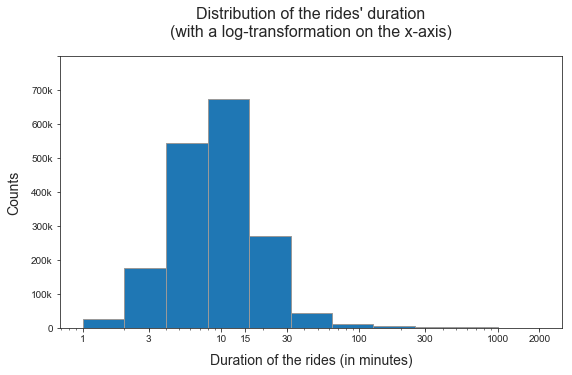

In [14]:
# plot the distribution with a log scale on the x values
fig = plt.figure(figsize=[9,5]);
n, bins, patches= plt.hist(x=df_rentals['duration_min'], bins=bins_10, edgecolor='0.6');
plt.xscale('log');
x_ticks = [1, 3, 10, 15, 30, 100, 300, 1e3, 2e3] # xticks in the original units
str_xticks = ['{:.0f}'.format(v) for v in x_ticks] # ticks labels
plt.xticks(x_ticks, str_xticks);
yticks, ylabels= plt.yticks();
ylabels=[0, "100k", "200k", "300k", "400k", "500k", "600k", "700k"];
plt.yticks(yticks, ylabels);
plt.xlabel('Duration of the rides (in minutes)', labelpad=10, fontsize=14)
plt.ylabel('Counts', fontsize=14, labelpad=10);
plt.title('Distribution of the rides\' duration\n(with a log-transformation on the x-axis)', \
          pad=20, fontsize=16);

In [15]:
print(n); # frequencies of rides in each bin
print(bins) # bin edges

[2.67780e+04 1.74874e+05 5.44521e+05 6.74209e+05 2.71372e+05 4.29220e+04
 1.07710e+04 4.31000e+03 1.55200e+03 1.09400e+03 6.00000e+02]
[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.300e+01
 1.260e+02 2.510e+02 5.010e+02 1.000e+03 1.995e+03]


<font size="3">The distribution of the duration looks "log-normal" with most values located between 4 and about 15 minutes.</font>

<font size="3">To make a finer assumption on the distribution, let us plot the distribution on a linear scale again, for the rentals which duration does not exceed 100 minutes (1hour and 40 minutes), which represents 99% of all the rentals recorded:</font>

In [16]:
df_minus_100 = df_rentals[df_rentals.duration_min <101]
minus_100_in_percent = df_minus_100.shape[0]/df_rentals.shape[0]*100
print(minus_100_in_percent)
print(bins, n)

99.43479845727589
[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.300e+01
 1.260e+02 2.510e+02 5.010e+02 1.000e+03 1.995e+03] [2.67780e+04 1.74874e+05 5.44521e+05 6.74209e+05 2.71372e+05 4.29220e+04
 1.07710e+04 4.31000e+03 1.55200e+03 1.09400e+03 6.00000e+02]


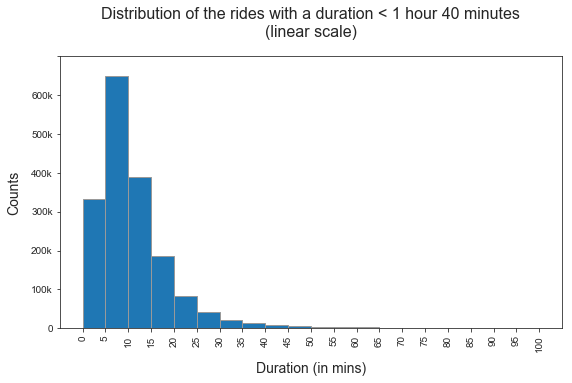

In [17]:
bins_int= np.arange(0, 101, 5).round()
fig = plt.figure(figsize=[9,5])
n, bins, patches= plt.hist(df_minus_100.duration_min, bins=bins_int, edgecolor='0.6')
plt.xticks(bins, bins, rotation=90);
y_ti, lab=plt.yticks()
plt.yticks(y_ti, [0, "100k", "200k", "300k", "400k", "500k", "600k"])
plt.xlabel("Duration (in mins)", labelpad=10, fontsize=14);
plt.ylabel("Counts", labelpad=10, fontsize=14);
plt.title("Distribution of the rides with a duration < 1 hour 40 minutes\n(linear scale)", fontsize=16, pad=20);

<font size="3">The most common rentals duration is between 5 and 10 minutes.</font>

In [18]:
df_5_10= df_rentals.query('duration_min >=5 and duration_min<101')
print(df_5_10.shape[0]/df_rentals.shape[0]*100)

80.42787148681434


## Q: How long do the rides take?<br>A:
The rides's duration takes a wide range of values (between 1 minute and almost 24 hours). More than $99\%$ of the rides last up to 100 minutes (1 hour and 40 minutes) and more than $80\%$ of them, last between 5 and 10 minutes.

## Who uses rentals, when ?
We will differenciate the use of rentals in time, for the different levels of the categorical features, "User-Type" and "Gender". First for each feature separately and eventually combining them. 

### 1. Rentals by Pick-Up Time units, for "Subscribers" versus "Customers"
An overview by months, week and day.<br>
To create the following plots, we will make use of clustered barcharts with which we can introduce a cluster of bars for each level of a second nominal variable (here 'User-Type'), for each value of a first ordinal variable (here the different pick-up time units). The y-axis represents the counts of each bar.

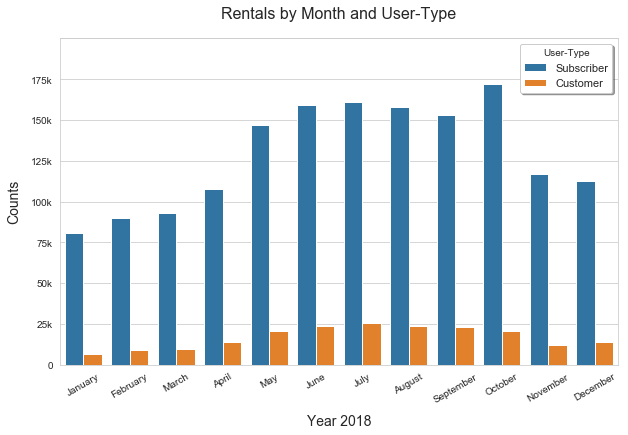

In [19]:
# use seaborn's countplot function to plot the counts for two categorical variables
sns.set_style('whitegrid')
plt.figure(figsize=[10,6]);
sns.countplot(data=df_rentals, x='month', hue='user_type');
plt.xticks(np.arange(12), labels= months, rotation=30);
yticks, ylabels= plt.yticks();
plt.yticks(yticks, [0, "25k", "50k", "75k", "100k", "125k", "150k", "175k"]);
plt.xlabel('Year 2018', fontsize=14, labelpad=10);
plt.ylabel('Counts', fontsize=14, labelpad=10);
plt.legend(loc='best', fontsize=11, title="User-Type", shadow=True);
plt.title("Rentals by Month and User-Type", fontsize=16, pad=20);

<font size="3">Note:<br>Because of the important scale differences within the "User-Type" category (there are much more "Subscribers" than "Customers"), we will next rather want to display the <em>proportions</em> of users of each type, along the pick-up time measures (here the months of the year).<br>So for each User-Type, the bars for all values on the x-axis, will add to 100%.</font> 

In [20]:
# get proportions of rentals per user type, for each month of the year
usertype_prop_bymonth= (df_rentals.groupby(['user_type'])['month']
                                      .value_counts(normalize= True)
                                      .rename('percentage')
                                      .mul(100)
                                      .reset_index())
print(usertype_prop_bymonth.head())

  user_type  month  percentage
0  Customer      7   12.751923
1  Customer      6   11.832242
2  Customer      8   11.647812
3  Customer      9   11.544965
4  Customer     10   10.214394


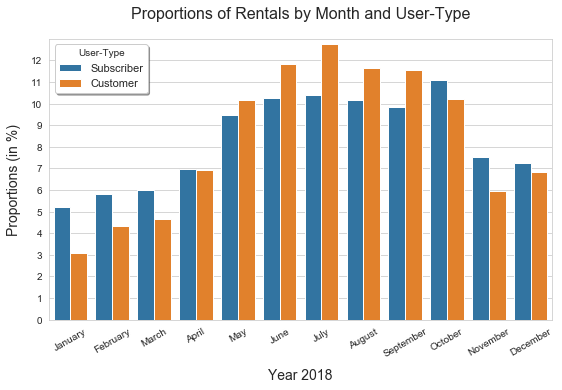

In [21]:
fig=plt.figure(figsize=[9,5]);
sns.barplot(data=usertype_prop_bymonth, x='month', y= 'percentage', hue='user_type', 
            hue_order=['Subscriber', 'Customer']);
locs, labs= plt.xticks();
plt.xticks(ticks=locs, labels=months, rotation=30);
plt.yticks(np.arange(13), np.arange(13));# set the y-axis values from 0 to 12 percents
plt.ylim(0,13);
plt.xlabel('Year 2018', fontsize=14, labelpad=10);
plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
plt.title("Proportions of Rentals by Month and User-Type", fontsize=16, pad=20);
plt.legend(title='User-Type', loc='upper left', fontsize=11, shadow= True);
plt.subplots_adjust(bottom=0.1)

<font size="3">Plotting the <em>proportions</em> rather than the counts, help us compare better, the distributions of the User-Types by months of the year. We observe the same tendency for both types, than in the previous univariate distribution: Most rentals, in both groups, are contracted from May until October. Furthermore, we observe a higher use of rentals, <em>in proportion</em>, by "Customer" users from May to September. "Subscriber" users make a bigger use of rentals from October until March. During the month of April there is an equal proportion of rentals contracted by both groups.</font>

In [22]:
# get proportions of rentals per user type, for each day of the week
usertype_prop_weekday= (df_rentals.groupby(['user_type'])['weekday_name']
                                        .value_counts(normalize=True)
                                        .rename('percentage')
                                        .mul(100)
                                        .reset_index())
print(usertype_prop_weekday.head())

  user_type weekday_name  percentage
0  Customer     Saturday   17.480370
1  Customer       Friday   15.141611
2  Customer       Sunday   14.950258
3  Customer     Thursday   14.119578
4  Customer    Wednesday   13.324994


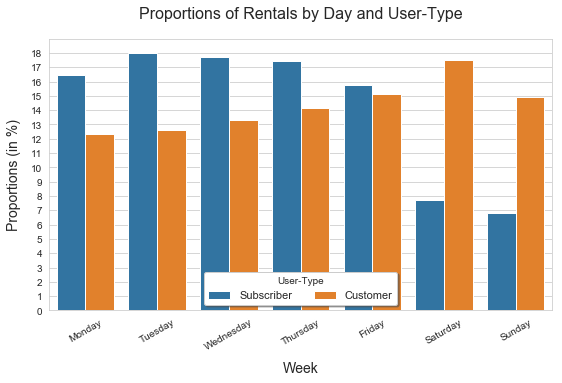

In [23]:
fig= plt.figure(figsize=[9,5]);
sns.barplot(data=usertype_prop_weekday, x='weekday_name', y='percentage', hue='user_type', \
            order=days, hue_order=['Subscriber', 'Customer'])
locs,labs= plt.xticks()
plt.xticks(locs, labels=days, rotation=30);
plt.yticks(np.arange(19), np.arange(19));# set the y-axis values from 0 to 18 percents
plt.ylim(0,19);
plt.xlabel('Week', fontsize=14, labelpad=10);
plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
plt.title("Proportions of Rentals by Day and User-Type", fontsize=16, pad=20);
plt.legend(title='User-Type', loc='lower center', fontsize=11, shadow=True, framealpha=1.0, ncol=2);

<font size= "3">A very clear opposite pattern of use, between the two groups, appears here: "Customer" users mostly use rentals on fridays and during the week-end, as opposed to "Subscriber" users, who use more than twice as much rentals, on working days than on the week-end.</font>

In [24]:
# get proportions of rentals per user type, for each hour of the day
usertype_prop_byhour = (df_rentals.groupby(['user_type'])['hour_of_day']
                                       .value_counts(normalize=True)
                                       .rename('percentage')
                                       .mul(100)
                                       .reset_index())
print(usertype_prop_byhour.head())

  user_type  hour_of_day  percentage
0  Customer           17   10.947173
1  Customer           18    9.185439
2  Customer           16    8.641047
3  Customer           15    7.420739
4  Customer           14    7.015783


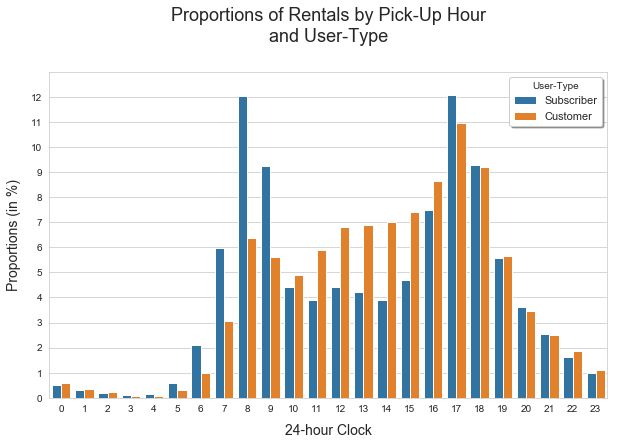

In [25]:
plt.figure(figsize=[10,6])
sns.barplot(data=usertype_prop_byhour, x='hour_of_day', y='percentage', hue='user_type', \
            hue_order=['Subscriber', 'Customer']);

plt.xlabel("24-hour Clock", labelpad=10, fontsize=14);
plt.title("Proportions of Rentals by Pick-Up Hour\nand User-Type", pad=30, fontsize=18);
plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
plt.yticks(np.arange(13), np.arange(13));# set the y-axis values from 0 to 12 percents
plt.ylim(0,13);
plt.legend(title="User-Type", fontsize=11, shadow=True);

<font size="3">We see a clear difference in the use of rentals by pick-up hour, for each user-type:<br>The distribution for "Subscriber" users is similar to the univariate distribution: It looks bimodal with two big peaks around 8am and 5pm. "Customers", on the other hand, mostly pick-up rentals around 5pm and use more rentals,<em> in proportion</em>, between 10am and 4pm, than "Subscribers".</font>

### Summary for Rentals by User-Type and Pick-Up Time:<br>

"Customers" use more rentals, <em>in proportion</em>, from May to September, while "Subscribers" use more rentals from October until March.
"Customers" use more rentals during the week-end than during the working days, as opposed to Subscribers.
"Subscribers" use rentals daily, mainly at opening/closing office hours (around 8am and 5pm), while "Customers", use more rentals, <em>in proportion</em>, between 10am and 4pm


### 2. Rentals by Pick-Up Time units and Gender.
An overview by month, week and day

In [26]:
# get proportions for each gender, along all months of the years 
gender_props_bymonth = (df_rentals.groupby(['gender'])['month']
                     .value_counts(normalize=True)# get proportions instead of counts
                     .rename('percentage')
                     .mul(100) # get percents
                     .reset_index())
gender_props_bymonth.sort_values('month', inplace=True)
gender_props_bymonth.reset_index(inplace=True, drop=True)
print(gender_props_bymonth.head())
print(gender_props_bymonth.describe())

   gender  month  percentage
0   Other      1    4.412688
1    Male      1    5.085689
2  Female      1    4.627293
3    Male      2    5.672607
4  Female      2    5.526029
          month  percentage
count  36.00000   36.000000
mean    6.50000    8.333333
std     3.50102    2.340514
min     1.00000    4.412688
25%     3.75000    6.363471
50%     6.50000    8.280713
75%     9.25000   10.559973
max    12.00000   11.665005


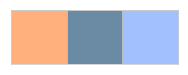

In [27]:
# Take new colors for the next barplots:
my_pal= [sns.xkcd_rgb["peach"], sns.xkcd_rgb["grey blue"], sns.xkcd_rgb["pastel blue"]]
with sns.color_palette(my_pal):
    sns.palplot(sns.color_palette())

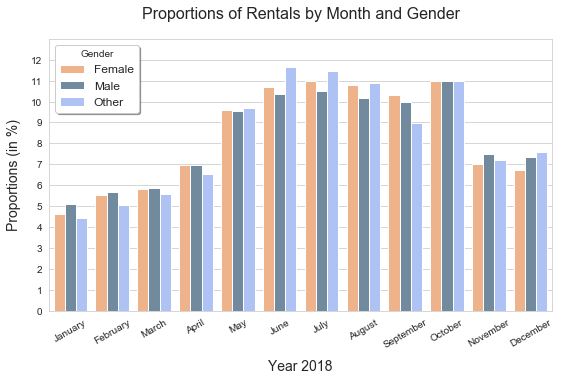

In [28]:
fig=plt.figure(figsize=[9,5]);
with sns.color_palette(my_pal):
    sns.barplot(x="month", y="percentage", hue="gender", data=gender_props_bymonth, hue_order= \
                ['Female', 'Male', 'Other']);
    locs, labs= plt.xticks();
    plt.xticks(ticks=locs, labels=months, rotation=30);
    plt.yticks(np.arange(13), np.arange(13));# set the y-axis values from 0 to 12 percents
    plt.ylim(0,13);
    plt.xlabel('Year 2018', fontsize=14, labelpad=10);
    plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
    plt.title("Proportions of Rentals by Month and Gender", fontsize=16, pad=20);
    plt.legend(title='Gender', loc='upper left', fontsize=12, shadow= True);
#    plt.tight_layout()

<font size="3">We observe the same tendency for each 'Gender' category than in the univariate distribution of rentals by month. Furthermore, while comparing the proportions across the groups, we notice that each one of them reaches a maximimum of rentals at a different month of the year: [June, July, October] for ["Other", "Female", "Male"] respectively. There also are clearly more rentals picked-up by 'Other' users, in proportion, during the month of June and July, than by the two other groups. 'Female' users rent more bikes than the others, in proportion, in September, while 'Male' users pick-up more rentals than the others during January and February.</font>

In [29]:
# plot proportions of rentals for each day of the week, for each gender group
gender_props_byday= (df_rentals.groupby(['gender'])['weekday_name']
                                    .value_counts(normalize=True) #get proportions
                                    .rename('percentage')
                                    .mul(100)
                                    .reset_index())
print(gender_props_byday.head())

   gender weekday_name  percentage
0  Female      Tuesday   17.265786
1  Female    Wednesday   16.905606
2  Female     Thursday   16.793236
3  Female       Monday   15.937210
4  Female       Friday   15.151757


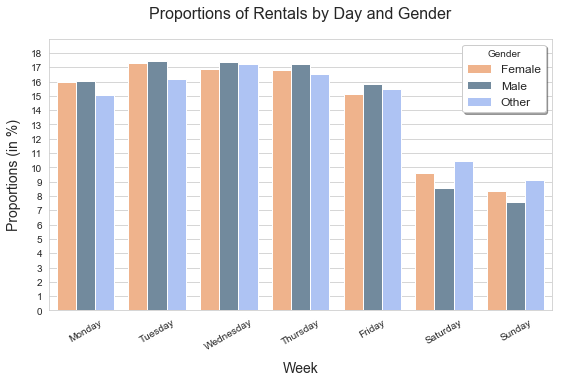

In [30]:
with sns.color_palette(my_pal):
    plt.figure(figsize=[9,5])
    sns.barplot(x='weekday_name', y='percentage', hue='gender', order=days, data=gender_props_byday,\
                hue_order=['Female', 'Male', 'Other']);
                # we use the same hue_order than for the previous plot for consistency
    locs, labels= plt.xticks();    
    plt.xticks(locs, labels=days, rotation=30);
    plt.yticks(np.arange(19), np.arange(19));# set the y-axis values from 0 to 18 percents 
    plt.ylim(0,19);
    plt.xlabel('Week', fontsize=14, labelpad=10);
    plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
    plt.title("Proportions of Rentals by Day and Gender", fontsize=16, pad=20);
    plt.legend(title='Gender', fontsize=12, shadow=True, framealpha=1.0);

<font size="3"> We observe for each group the same tendency than in the univariate distribution of rentals by day. A noticeable slight difference across the groups is that 'Male' users tend to pick more rentals during working days, than the two other groups, while 'Female' and 'Other' users tend to pick-up more rentals, <em>in proportion</em>, on the week-end, </font>

In [31]:
gender_props_byhour= (df_rentals.groupby(['gender'])['hour_of_day']
                                      .value_counts(normalize=True)
                                      .rename('percentage')
                                      .mul(100)
                                      .reset_index())
gender_props_byhour.head()

,gender,hour_of_day,percentage
0,Female,8,12.897722
1,Female,17,11.938918
2,Female,18,9.326759
3,Female,9,8.619189
4,Female,16,7.926694


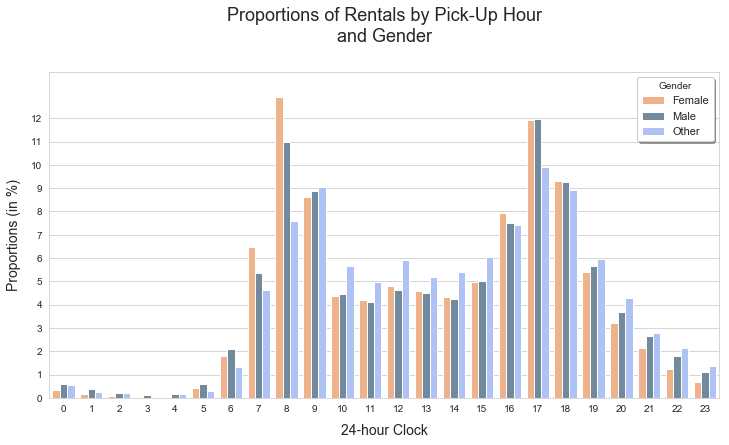

In [32]:
with sns.color_palette(my_pal):
    plt.figure(figsize=[12,6]);
    sns.barplot(x='hour_of_day', y='percentage', hue='gender', hue_order=['Female', 'Male', 'Other'], \
                data= gender_props_byhour);
    plt.xlabel("24-hour Clock", labelpad=10, fontsize=14);
    plt.title("Proportions of Rentals by Pick-Up Hour\nand Gender", pad=30, fontsize=18);
    plt.ylabel('Proportions (in %)', fontsize=14, labelpad=10);
    plt.yticks(np.arange(13), np.arange(13));# set the y-axis values from 0 to 12 percents
    plt.ylim(0,14);
    plt.legend(title="Gender", fontsize=11, shadow=True);

<font size="3">All three levels of 'Gender" share the shape of the univariate distribution of rentals by pick-up hour, that we depicted previously. We observe slight variations across the three groups: The most common pick-up hour for "Female" users is 8am, while "Male" and "Other" users mostly pick-up rentals at 5pm.<br>
We also notice that the distribution of Rentals for the "Other" users, is flatter than the two other ones. The peaks are lower and the proportions between them and after the second peak are bigger than for the two other groups.</font>

### Summary for Rentals by Gender and Pick-Up Time

'Female' and 'Other' users tend to pick-up more rentals, <em>in proportion</em>, during summer and week-ends, than 'Male' users.
'Female'users pick-up most rentals in the morning, at 8am while 'Male' and 'Other' users, mostly pick-up rentals at 5pm.<br>'Other' users show a bit less contrast in their weekly and daily use of the service: The distributions are slightly flatter than for the two other groups.  

### 3.  Rentals by Pick-Up Time units, by User-Type and Gender

A "Multivariate" Approach:<br><br>Now, that we depicted the amount of rentals by time, for each of the two categories "User-Type" and "Gender", we want to inspect if the categories strengthen each other, when we combine themin the same graphs.<br>
For all the plots in this section, we will generate heatmaps, depicting the proportions of rentals by User-Type and pick-up time units (month, week and day), for each of the three "Gender" categories.<br>
We will make use of the "heatmap" function, from the seaborn library here and will need to generate 3 matrices, for each time perspective, with one matrice for each "Gender" group.

In [33]:
# proportions of user_types of each gender by month of the year:
props_users_gender_bymonth = (df_rentals.groupby(['user_type', 'gender'])['month_name']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
props_users_gender_bymonth.head()

,user_type,gender,month_name,percentage
0,Customer,Female,July,12.709417
1,Customer,Female,August,11.371337
2,Customer,Female,June,11.340110
3,Customer,Female,September,11.140256
4,Customer,Female,May,10.192515


In [34]:
# get the subset for the 'Female' gender value and organize data in a matrix
df_female_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Female']
prop_user_by_month_female= df_female_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_female.min(axis=1).min(), prop_user_by_month_female.max(axis=1).max());# min and max %
prop_user_by_month_female= prop_user_by_month_female.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_female.head()

3.5973581900791607 12.70941652224148


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,3.597358,5.305479,5.886302,7.235312,10.192515,11.340110,12.709417,11.371337,11.140256,9.550799,5.549050,6.122067
Subscriber,4.803767,5.563819,5.821986,6.905482,9.482865,10.565826,10.710559,10.688889,10.159448,11.232510,7.241499,6.823350


In [35]:
# get the subset for the 'Male' gender value and organize data in a matrix
df_male_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Male']
prop_user_by_month_male= df_male_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_male.min(axis=1).min(), prop_user_by_month_male.max(axis=1).max());
prop_user_by_month_male= prop_user_by_month_male.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_male.head()

2.872354704487495 12.759309799710678


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,2.872355,3.837263,4.005041,6.763307,10.181498,12.062846,12.759310,11.795893,11.80335,10.542407,6.185406,7.191326
Subscriber,5.342905,5.885896,6.059989,6.976297,9.456758,10.162317,10.260065,9.986750,9.78614,11.056960,7.640087,7.385836


In [36]:
# get the subset for the 'Other' gender value and organize data in a matrix
df_other_group= props_users_gender_bymonth.loc[props_users_gender_bymonth['gender'] == 'Other']
prop_user_by_month_other= df_other_group.pivot(index='user_type', columns='month_name', \
                                                values='percentage')
print(prop_user_by_month_other.min(axis=1).min(), prop_user_by_month_other.max(axis=1).max());
prop_user_by_month_other= prop_user_by_month_other.reindex(months, axis=1)# reorder columns in the year's months order
prop_user_by_month_other.head()


3.153263260816426 13.175262771938401


month_name,January,February,March,April,May,June,July,August,September,October,November,December
user_type,,,,,,,,,,,,
Customer,3.153263,5.328770,6.135419,7.162063,10.095331,11.977512,13.175263,11.121975,9.410902,9.850892,5.499878,7.088731
Subscriber,4.636799,4.980426,5.489343,6.424532,9.595476,11.609395,11.174424,10.835146,8.912571,11.157025,7.525011,7.659852


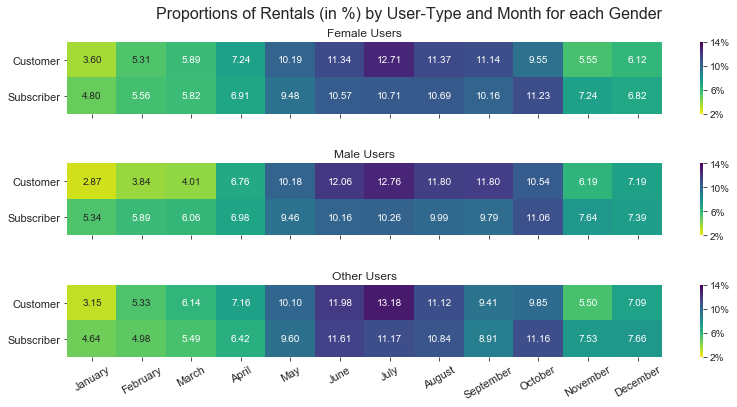

In [37]:
sns.set_style('ticks')
# plot the heatmaps within subplots:
fig= plt.figure(figsize=[12,6]);
plt.suptitle("Proportions of Rentals (in %) by User-Type and Month for each Gender", fontsize=16);
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 2
vmax_all= 14
plt.subplot(311); #3 lines-1st line: 
sns.heatmap(prop_user_by_month_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws = {'format': '%.0f%%', 'ticks':[2,6,10,14]})
plt.xlabel("");
plt.ylabel("");
plt.title("Female Users");
xticks, xlabs= plt.xticks()
plt.xticks(xticks, [""]);

yticks,ylabs= plt.yticks()
plt.yticks(yticks, ylabs, fontsize=11, rotation=0);

plt.subplot(312);
sns.heatmap(prop_user_by_month_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws = {'format': '%.0f%%', 'ticks':[2,6,10,14]})
plt.xlabel("")
plt.ylabel("");
plt.title("Male Users");
plt.xticks(xticks, [""])
plt.yticks(yticks, ylabs, fontsize=11, rotation=0);

plt.subplot(313);
sns.heatmap(prop_user_by_month_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws = {'format': '%.0f%%', 'ticks':[2,6,10,14]})
plt.xlabel("")
plt.ylabel("");
plt.title("Other Users");
plt.xticks(xticks, months, rotation=30, fontsize=11);
plt.yticks(yticks, ylabs, fontsize=11, rotation=0);

plt.subplots_adjust(top=0.9);
fig.tight_layout(pad=3)

<font size="3">We observe the same differences in the proportions of rentals for each level of the "Gender" category, than before, between the two User-Types: "Customers" use more rentals, <em>in proportion</em>, than "Subscribers" do, from May until September and less, during the rest of the year. The proportions are quite equally distributed across all three levels of gender.</font>

In [38]:
# proportions of user_types of each gender by day of the week:
props_users_gender_byday = (df_rentals.groupby(['user_type', 'gender'])['weekday_name']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
props_users_gender_byday.head()

,user_type,gender,weekday_name,percentage
0,Customer,Female,Saturday,19.609037
1,Customer,Female,Sunday,16.612800
2,Customer,Female,Friday,14.022515
3,Customer,Female,Thursday,13.304292
4,Customer,Female,Wednesday,12.347183


In [39]:
# verify that the percentages of all days add up to 100%, for each group:
props_users_gender_byday.groupby(['user_type', 'gender'])['percentage'].sum()

user_type   gender
Customer    Female    100.0
            Male      100.0
            Other     100.0
Subscriber  Female    100.0
            Male      100.0
            Other     100.0
Name: percentage, dtype: float64

In [40]:
# get the subset for the 'Female' gender value and organize data in a matrix
df_female_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Female']
prop_user_by_day_female= df_female_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_female

user_type,Customer,Subscriber
weekday_name,,
Friday,14.022515,15.345247
Monday,12.336253,16.554215
Saturday,19.609037,7.910324
Sunday,16.612800,6.904679
Thursday,13.304292,17.391048
Tuesday,11.767920,18.207817
Wednesday,12.347183,17.686669


In [41]:
# sort index in the order of the week:
prop_user_by_day_female= prop_user_by_day_female.reindex(days)
prop_user_by_day_female

user_type,Customer,Subscriber
weekday_name,,
Monday,12.336253,16.554215
Tuesday,11.767920,18.207817
Wednesday,12.347183,17.686669
Thursday,13.304292,17.391048
Friday,14.022515,15.345247
Saturday,19.609037,7.910324
Sunday,16.612800,6.904679


In [42]:
# get the subset for the 'Other' gender value and organize data in a matrix
df_other_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Other']
prop_user_by_day_other= df_other_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_other= prop_user_by_day_other.reindex(days)
prop_user_by_day_other

user_type,Customer,Subscriber
weekday_name,,
Monday,12.270838,15.550239
Tuesday,12.979712,16.776860
Wednesday,13.517477,17.890387
Thursday,15.228550,16.759461
Friday,14.959668,15.545890
Saturday,17.184063,9.225750
Sunday,13.859692,8.251414


In [43]:
# get the subset for the 'Male' gender value and organize data in a matrix
df_male_subset= props_users_gender_byday.loc[props_users_gender_byday['gender'] == 'Male']
prop_user_by_day_male= df_male_subset.pivot(index='weekday_name', columns='user_type', \
                                                values='percentage')
prop_user_by_day_male= prop_user_by_day_male.reindex(days)
prop_user_by_day_male

user_type,Customer,Subscriber
weekday_name,,
Monday,12.360372,16.463731
Tuesday,13.034465,17.966271
Wednesday,13.786109,17.761588
Thursday,14.475117,17.508984
Friday,15.681625,15.851935
Saturday,16.472790,7.662531
Sunday,14.189522,6.784959


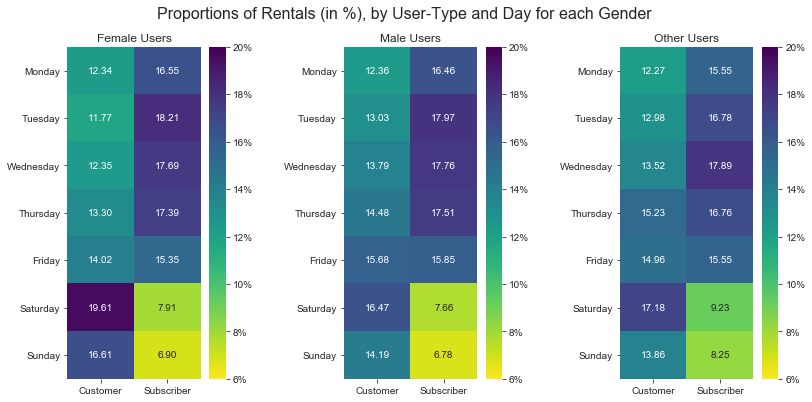

In [44]:
fig= plt.figure(figsize=[12, 6]);
plt.suptitle("Proportions of Rentals (in %), by User-Type and Day for each Gender", fontsize=16);
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 6 
vmax_all= 20
plt.subplot(131);
sns.heatmap(prop_user_by_day_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format': '%.0f%%', 'ticks':[6,8,10,12,14,16,18,20]})
plt.xlabel("")
plt.ylabel("")
plt.title("Female Users");

plt.subplot(132);
sns.heatmap(prop_user_by_day_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format': '%.0f%%', 'ticks':[6,8,10,12,14,16,18,20]})
plt.xlabel("")
plt.ylabel("")

plt.title("Male Users");

plt.subplot(133);
sns.heatmap(prop_user_by_day_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format': '%.0f%%', 'ticks':[6,8,10,12,14,16,18,20]})
plt.xlabel("")
plt.ylabel("")

plt.title("Other Users");
plt.subplots_adjust(top=0.9);
fig.tight_layout(pad=3.5)

<font size="3">We clearly observe for each level of the "Gender" category, the same polarity of use as observed before, between the two User-Types: "Customers" use a much higher proportion of rentals, during the week-end, than "Subscribers". During the working days, we observe the opposite, with less contrast though: "Subscribers" use a a bigger proportion of rentals than "Customers" do.<br>
We notice that the contrast in the proportions of use between "Customers" and "Subscribers", is stronger in the group of "Female" users than in the two other groups.</font>

In [45]:
# proportions of user_types of each gender by hour of the day:
props_users_gender_byhour = (df_rentals.groupby(['user_type', 'gender'])['hour_of_day']
                                    .value_counts(normalize=True)
                                    .mul(100)
                                    .rename('percentage')
                                    .reset_index())
#verify the percentages add to 100% for each group:
print(props_users_gender_byhour.groupby(['user_type', 'gender'])['percentage'].sum())

props_users_gender_byhour.head()

user_type   gender
Customer    Female    100.0
            Male      100.0
            Other     100.0
Subscriber  Female    100.0
            Male      100.0
            Other     100.0
Name: percentage, dtype: float64


,user_type,gender,hour_of_day,percentage
0,Customer,Female,17,10.578169
1,Customer,Female,16,8.940309
2,Customer,Female,18,8.724843
3,Customer,Female,15,7.773978
4,Customer,Female,13,7.391447


In [46]:
# get the subset for the 'Female' gender value and organize data in a matrix
df_female= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Female']
prop_user_by_hour_female= df_female.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
# get min and max values for setting colormap boundaries later
print(prop_user_by_hour_female.min(axis=1).min(), prop_user_by_hour_female.max(axis=1).max())
prop_user_by_hour_female.head()

0.034349774384436434 13.947136092458331


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.434056,0.196731,0.103049,0.034350,0.064015,0.168626,0.733836,3.093041,6.773151,5.591206,...,7.360220,7.773978,8.940309,10.578169,8.724843,5.250831,3.197652,2.185895,1.598826,0.875919
Subscriber,0.304181,0.137510,0.071163,0.038792,0.045213,0.474063,1.971695,7.069745,13.947136,9.138019,...,3.825678,4.472297,7.753016,12.172075,9.429894,5.437813,3.237914,2.144252,1.195324,0.631371


In [47]:
# get the subset for the 'Male' gender value and organize data in a matrix
df_male= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Male']
prop_user_by_hour_male= df_male.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
print(prop_user_by_hour_male.min(axis=1).min(), prop_user_by_hour_male.max(axis=1).min())
prop_user_by_hour_male.head()

0.0902271337598616 11.144169537530013


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.687516,0.410123,0.275155,0.102158,0.090227,0.356434,1.144617,3.065486,6.198828,5.614216,...,6.871430,7.254709,8.514160,11.14417,9.39257,5.811821,3.580004,2.661328,1.973812,1.200543
Subscriber,0.602091,0.352606,0.220021,0.138477,0.184752,0.618902,2.185655,5.632771,11.516241,9.256234,...,3.918356,4.755806,7.399961,12.07613,9.26334,5.636498,3.711333,2.650915,1.769963,1.089968


In [48]:
# get the subset for the 'Other' gender value and organize data in a matrix
df_other= props_users_gender_byhour.loc[props_users_gender_byhour['gender'] == 'Other']
prop_user_by_hour_other= df_other.pivot(index='user_type', columns='hour_of_day', \
                                                values='percentage')
print(prop_user_by_hour_other.min(axis=1).min(), prop_user_by_hour_other.max(axis=1).min())
prop_user_by_hour_other.head()

0.034797738147020446 9.865158764680295


hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
user_type,,,,,,,,,,,,,,,,,,,,,
Customer,0.513322,0.439990,0.415546,0.122220,0.244439,0.586654,0.586654,3.00660,5.915424,5.744317,...,6.355414,7.333170,8.115375,10.266439,9.606453,7.382058,3.984356,2.591054,2.151063,1.271083
Subscriber,0.539365,0.200087,0.160940,0.034798,0.126142,0.217486,1.474554,4.92388,7.907786,9.612875,...,5.237060,5.793823,7.285776,9.865159,8.821227,5.724228,4.358417,2.827316,2.127012,1.357112


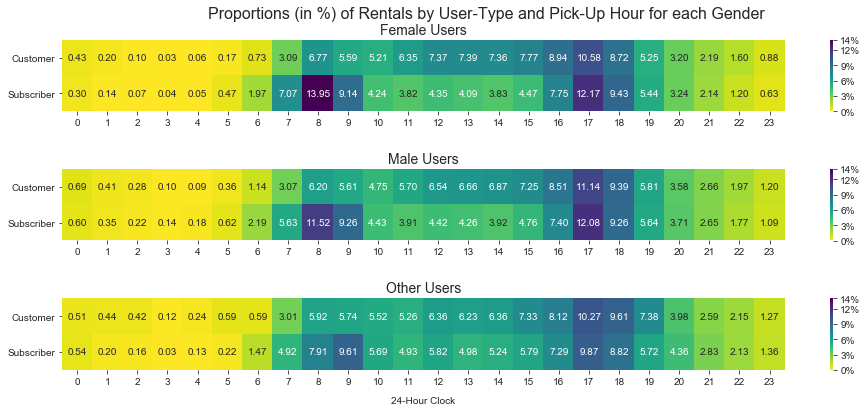

In [49]:
# plot the heatmaps within subplots:
fig= plt.figure(figsize=[14,6]);
plt.suptitle("Proportions (in %) of Rentals by User-Type and Pick-Up Hour for each Gender", fontsize=16)
#set the same boundaries to the 3 colormaps to compare the subplots
vmin_all= 0.03
vmax_all= 14
plt.subplot(311);
sns.heatmap(prop_user_by_hour_female, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format':'%.0f%%', 'ticks':[0,3,6,9,12,14]})
plt.xlabel("")
plt.ylabel("")
y_ticks, ylabs=plt.yticks()
plt.yticks(y_ticks, ylabs, rotation=0)
plt.title("Female Users", fontsize=14);

plt.subplot(312);
sns.heatmap(prop_user_by_hour_male, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format':'%.0f%%', 'ticks':[0,3,6,9,12,14]})
plt.xlabel("")
plt.ylabel("")
plt.yticks(y_ticks, ylabs, rotation=0)
plt.title("Male Users", fontsize=14);

plt.subplot(313);
sns.heatmap(prop_user_by_hour_other, annot=True, fmt='.2f', cmap='viridis_r', cbar=True, \
           vmin=vmin_all, vmax=vmax_all, cbar_kws={'format':'%.0f%%', 'ticks':[0,3,6,9,12,14]})
plt.xlabel("24-Hour Clock", labelpad=10)
plt.ylabel("")
plt.yticks(y_ticks, ylabs, rotation=0)
plt.title("Other Users", fontsize=14);

plt.subplots_adjust(top=0.9);
fig.tight_layout(pad=2.5)

<font size="3">We observe the same tendency within a day, for each level of the "Gender" category, than before, within the two groups of users: "Subscribers" mostly use rentals at 8am and 5pm
whereas "Customers" mostly use rentals at 5pm and more than "Subscribers", in proportion, between 11am and 3pm.<br> 
There is a higher contrast in the proportions of use between the two User-Types in the "Female" group.</font>

### Summary for Rentals by Pick-Up Time units, by User-Type and Gender:

We observed for each category of gender, the same contrast of use, between "Customers" and "Subscribers" as depicted before. We could notice a slight increase of the Contrast, between the two user-types, in the "Female" group, while looking at proportions of rentals per week and per hour.

<h2> Q: Who uses Rentals, when?<br>A:</h2><br>
<font size="3.5">The most noticeable differences of Rentals' use by time, are best explained by the User-Type characteristic:<ul><li>Customers use more rentals, <em>in proportion</em>, from May to September, while Subscribers use more rentals from October until March</li><li>Customers use more rentals during the week-end than during the working days, as opposed to Subscribers</li><li>Subscribers use rentals daily mainly at opening/closing office hours (around 8am and 5pm), while Customers, use rentals mainly around 5 pm and use more rentals than Subscribers, <em>in proportion</em>, between 10am and 4pm.</li></ul><br><br>
We also notice following differences across the levels of the Gender Charcteristic, less contrasted:<ul><li>'Female' and 'Other' users tend to pick-up more rentals, <em>in proportion</em>, during summer and week-ends, than 'Male' users</li><li>'Female'users pick-up most rentals in the morning, at 8am and more, <em>in proportion</em>, than the two other groups do</li><li>'Other' users show a bit less contrast in their weekly and daily use of the service: The distributions are slightly flatter than for the two other groups.</li>
</ul><br><br>Finally, through a 'multivariate' approach, we could notice a slight increase of the polarity of Rentals' use between "Customers" and "Subscribers" in the 'Female' group. In other words, in the 'Female' group, the contrast between the proportions of rentals by time for the two User-Types is slightly stronger.</font>

## Who, for how long?

An overview of the duration distributions by User-Type and Gender using boxplots and bargraphs.<br><br>
To generate the boxplots, we will have to use a logarithmic transform of the duration values. This is due to the shape of the duration distribution, as we saw previously. For each boxplot, we depict the "5-summary statistics" of the duration variable on the y-axis (1st and 3d quartile as bottom and top of each box and the median value as the middle line), for each level of the categorical user characteristic (User-Type and Gender), on the x-axis.

In [50]:
# compute the logarithm of duration_min to make plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
# adding a 'log_duration' column to the dataset.
df_rentals['log_duration'] = df_rentals['duration_min'].apply(log_trans)

In [51]:
sns.set_style("darkgrid")

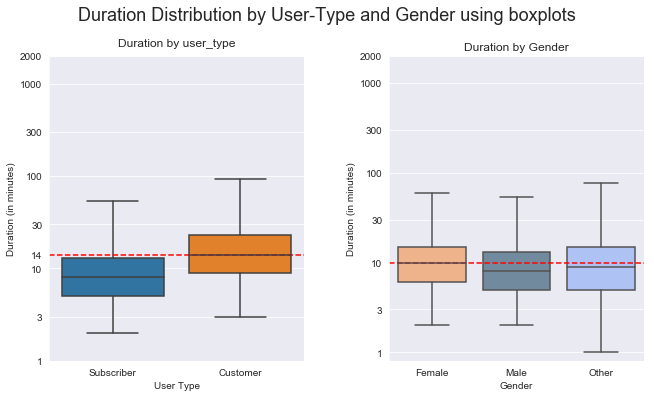

In [52]:
# duration distribution by user type
plt.figure(figsize=[10, 6]);
plt.suptitle("Duration Distribution by User-Type and Gender using boxplots", fontsize=18)

# change appearance of outliers:
flierprops = dict(markerfacecolor='0.8', markersize=1, linestyle='none')
plt.subplot(121);
sns.boxplot(x='user_type', y='log_duration', data=df_rentals, showfliers=False);
plt.axhline(y=np.log10(14), ls='--', color='red');
y_ticks= [1, 3, 10 , 14, 30, 100 ,300, 1000, 2000]
plt.yticks(np.log10(y_ticks), y_ticks);
plt.xlabel('User Type');
plt.ylabel('Duration (in minutes)');
plt.title('Duration by user_type', pad=10);

plt.subplot(122);
with sns.color_palette(my_pal):
    sns.boxplot(x='gender', y='log_duration', data=df_rentals, order=['Female', 'Male', 'Other'], showfliers=False);
    y_ticks= [1, 3, 10 ,30, 100 ,300, 1000, 2000]
    plt.yticks(np.log10(y_ticks), y_ticks);
    plt.xlabel('Gender');
    plt.ylabel('Duration (in minutes)');
    plt.title('Duration by Gender');
    plt.axhline(y=np.log10(10), ls='--', color='red');
plt.subplots_adjust(top=0.9)
plt.tight_layout(4.0)

<font size="3">The first plot reveals that "Subscribers" tend to use rentals for an overall much shorter time than "Customers". The median value for "Customers" (14 minutes), is even above the third quartile of the boxplot representing the "Subscribers".<br>For the "Gender" category, the differences between the levels are smaller, yet we clearly see that 'Male' users tend to use rentals for a shorter time than the two other groups. And 'Female' users tend to use rentals for a longer time than the two other groups.<br>(Note: We removed "outliers" (extreme value points) from the graphs, for clarity purposes.)</font>

<font size="3">Lets depict the median duration for User-Type and Gender, using a barchart:</font>

In [53]:
# median duration for Subscriber/Customer variable:
median_duration_usertype= df_rentals.groupby(['user_type'])['duration_min'].median()
median_duration_usertype.head()

user_type
Customer      14
Subscriber     8
Name: duration_min, dtype: int64

In [54]:
median_gender= df_rentals.groupby(['gender'])['duration_min'].median()
median_gender.head()

gender
Female    10
Male       8
Other      9
Name: duration_min, dtype: int64

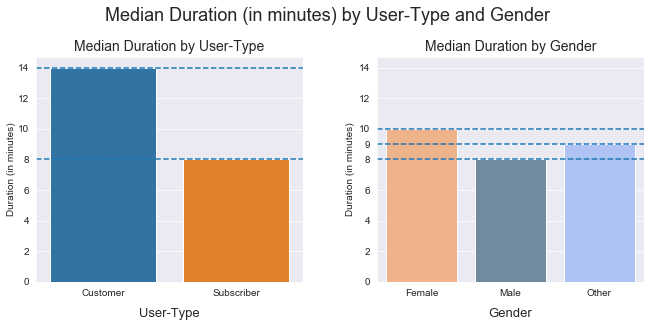

In [55]:
fig= plt.figure(figsize=[10,5]);
plt.suptitle("Median Duration (in minutes) by User-Type and Gender", fontsize=18);
plt.subplot(1,2,1)
ax1= sns.barplot(median_duration_usertype.index, median_duration_usertype)
plt.ylabel('Duration (in minutes)', labelpad= 2);
plt.xlabel('User-Type', fontsize=13, labelpad=10);
plt.title("Median Duration by User-Type", fontsize=14);
plt.axhline(y=14, ls='--');
plt.axhline(y=8, ls='--');

with sns.color_palette(my_pal):
    plt.subplot(1,2,2)
    sns.barplot(median_gender.index, median_gender, order=['Female', 'Male','Other']);
    plt.ylim(ax1.get_ylim()); # setting the same scale on the two plots
    plt.yticks([0,2,4,6,8,9,10,12,14], [0,2,4,6,8,9,10,12,14]);
    plt.ylabel('Duration (in minutes)');
    plt.xlabel('Gender', fontsize=13, labelpad=10);
    plt.title('Median Duration by Gender', fontsize=14);
    plt.axhline(y=10, ls='--');
    plt.axhline(y=8, ls='--');
    plt.axhline(y=9, ls='--');

#plt.subplots_adjust(top=0.9)
plt.tight_layout(4.0)

<font size="3">These barcharts tell us the same, for both categories, than the previous boxplots, but focusing on the median value of the rentals' duration:<br>"Subscribers tend to use rentals for a much shorter time than Customers (14 min versus 8 min for the median value).<br>The variation across the gender groups is smaller (10, 9 and 8 minutes for ['Female', 'Other' and 'Male'] respectively. This can be explained by the fact that 88,5% of the observed population are "Subscribers", across all levels of Gender.)</font>

## Q: Who, for how long?<br>A:
- 'Customers' tend to use rentals for a much longer time than 'Subscribers' (14 minutes vs. 8 minutes)
- 'Female' users tend to use rentals for a slight longer time than the two other gender groups (10 , 9 and 8 minutes for ['Female', 'Other' and 'Male'] respectively).<br><br>
<em>We examined the median value of the duration for both categories.</em>

## Who, when and for how long?

We will finally depict the median Duration of rentals by Pick-Up Time units and User-Type, using clustered barcharts.
An overview by months, week and day.

In [56]:
# plot the median duration by user-type and month
df_durationbymonth= df_rentals.groupby(['month', 'user_type'])['duration_min'].median().reset_index()
df_durationbymonth.head()

,month,user_type,duration_min
0,1,Customer,14
1,1,Subscriber,8
2,2,Customer,15
3,2,Subscriber,8
4,3,Customer,15


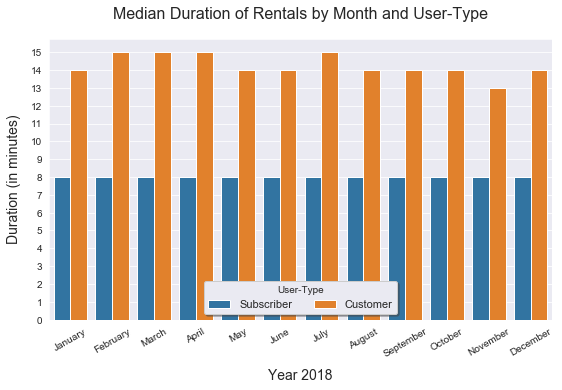

In [57]:
plt.figure(figsize=[9,5]);
sns.barplot(data=df_durationbymonth, x='month', y='duration_min', hue='user_type', \
            hue_order=['Subscriber', 'Customer']);
locs, labs= plt.xticks();
plt.xticks(ticks=locs, labels=months, rotation=30);
plt.yticks(np.arange(16), np.arange(16));
plt.xlabel('Year 2018', fontsize=14, labelpad=10);
plt.ylabel('Duration (in minutes)', fontsize=14, labelpad=10);
plt.title("Median Duration of Rentals by Month and User-Type", fontsize=16, pad=20);
plt.legend(title='User-Type', loc='lower center', ncol=2,  fontsize=11, shadow= True);
plt.subplots_adjust(bottom=0.1)


<font size="3">The variation of the median duration of rentals by Pick-Up time and User-Type, looks very contrasted:<br>The median duration of the trips remains constant through the year for "Subscribers"(8 minutes).<br>For the "Customers", the trips' duration is much longer and vary from 13 to 15 minutes</font> 

In [58]:
# plot the Duration by User-type and days of the week
df_3vars= df_rentals.groupby(['weekday_name', 'user_type'])['duration_min'].median().reset_index()
df_3vars.head()

,weekday_name,user_type,duration_min
0,Friday,Customer,13
1,Friday,Subscriber,8
2,Monday,Customer,13
3,Monday,Subscriber,8
4,Saturday,Customer,18


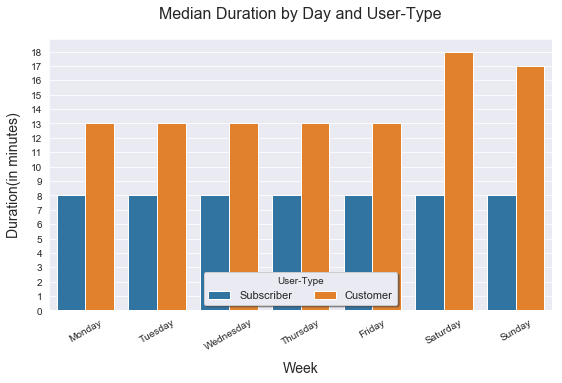

In [59]:
plt.figure(figsize=[9,5]);
sns.barplot(data=df_3vars, x= 'weekday_name', order= days, y= 'duration_min', hue= 'user_type',\
            hue_order=['Subscriber', 'Customer'])
locs,labs= plt.xticks()
plt.xticks(locs, labels=days, rotation=30);
plt.yticks(np.arange(19), np.arange(19));
plt.title('Median Duration by Day and User-Type', fontsize=16, pad=20);
plt.xlabel('Week', fontsize=14, labelpad=10);
plt.ylabel('Duration(in minutes)', fontsize=14, labelpad=10);
plt.legend(title='User-Type', loc='lower center', fontsize=11, shadow=True, framealpha=1.0, ncol=2);

<font size="3">The median duration within the "Customers" group vary from 13 to 18 minutes, while it remains constant,the whole week, within the "Subscribers" group (8 minutes).<br>The difference between the durations for the two User-Types reaches its maximum on the week-end.</font>

In [60]:
# plot the median duration by user-type and hour of day
df_3vars2= df_rentals.groupby(['hour_of_day', 'user_type'])['duration_min'].median().reset_index()
df_3vars2.head()

,hour_of_day,user_type,duration_min
0,0,Customer,11.0
1,0,Subscriber,7.0
2,1,Customer,12.5
3,1,Subscriber,7.0
4,2,Customer,13.0


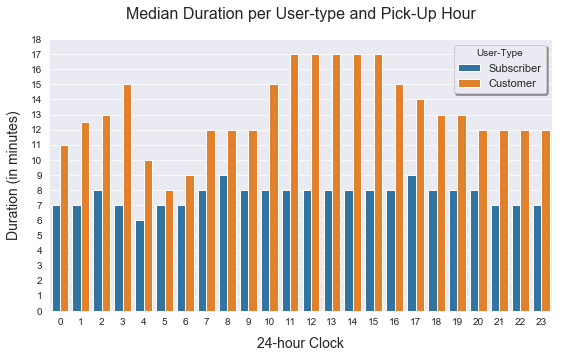

In [62]:
plt.figure(figsize=[9,5]);
sns.barplot(data=df_3vars2, x= 'hour_of_day', y= 'duration_min', hue= 'user_type', \
            hue_order=['Subscriber', 'Customer']);
plt.legend(loc='lower center');
plt.yticks(np.arange(0, 19), np.arange(0, 19));
plt.title('Median Duration per User-type and Pick-Up Hour', fontsize=16, pad=20);
plt.xlabel("24-hour Clock", labelpad=10, fontsize=14);
plt.ylabel('Duration (in minutes)', fontsize=14, labelpad=10);

plt.legend(title="User-Type", fontsize=11, shadow=True);

<font size="3">We observe a similar tendency in the difference between the two User-Types here:<br>The "Subscribers" group tend to use rentals for a shorter time (about 8 minutes) with much fewer variation by Pick-Up Hour, than the "Customers", for which the trips' duration vary from 8 to 17 minutes, with the longest trips from 11am to 15pm.</font>

## Q: Who, when and for how long?<br>A:

We found out that the User-Type feature, explains more precisely, how the trips' duration vary by times of pick-up:<br>
- in the "Subscribers" group, the median duration of the rentals remains quite constant by month, week or during the day(about 8 minutes) 
- "Customers", on the other hand, tend to rent bikes for a much longer time on the week-end(about 18 minutes) than during working days(13 minutes)and during the day, between 11am and 3pm(17 minutes), compared to about 12 minutes, otherwise. The duration time shows less fluctuation, when looking at the median variation by month (between 13 and 15 minutes).

# Conclusion

The User-Type Feature of the Dataset, illustrates the best, how the Bikes Rentals are used for:
- Day-to-day transportation as Commuting to work, are the main purposes, why residents of the Bay use the rentals service, all year long and for a quite constant period of time.
- Recreational or touristic transportation, represents another way of using the rentals, in a much smaller proportion, all year long and for longer periods of time.